In [20]:
import pandas as pd
import numpy as np
import re
import plotly.express as iplot
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
data=pd.read_csv(r"F:\datasets\AnnotatedData3.csv")
data.head()

,class,text
0,yes,i'll buy the iphone x if it can get ac...
1,no,Some dude in FB selling the iPhone X 64 gb...
2,yes,Home dab emote man today and I get hopped on...
3,yes,Buy an iPhone X
4,no,I hate iOS 11. My iPhone 6+ works 10X slower...


## Exploratory data analysis

In [22]:
data.shape
data.isnull().sum()

class    867
text     867
dtype: int64

## Data preprocessing

In [23]:
data['class']=data['class'].replace(['Undefined','undefined'],'un')
data=data[data['class']!='un']
data.head(10)


,class,text
0,yes,i'll buy the iphone x if it can get ac...
1,no,Some dude in FB selling the iPhone X 64 gb...
2,yes,Home dab emote man today and I get hopped on...
3,yes,Buy an iPhone X
4,no,I hate iOS 11. My iPhone 6+ works 10X slower...
7,no,Bo-go sale tomorrow at T-Mobile buy one get...
8,yes,I can get the iPhone X here.... If I'm w...
9,yes,When you buy an Iphone X with Unlimited ...
10,yes,i really wish i get to meet you one day yo...
11,no,@ sprint @sprintcare if I switch to @TMobile...


In [24]:
data['class']=data['class'].apply(lambda x: 1 if x=='yes' else 0)
data.head(10)

,class,text
0,1,i'll buy the iphone x if it can get ac...
1,0,Some dude in FB selling the iPhone X 64 gb...
2,1,Home dab emote man today and I get hopped on...
3,1,Buy an iPhone X
4,0,I hate iOS 11. My iPhone 6+ works 10X slower...
7,0,Bo-go sale tomorrow at T-Mobile buy one get...
8,1,I can get the iPhone X here.... If I'm w...
9,1,When you buy an Iphone X with Unlimited ...
10,1,i really wish i get to meet you one day yo...
11,0,@ sprint @sprintcare if I switch to @TMobile...


In [25]:
data.shape

(2433, 2)

In [26]:
data.shape
print(data['text'][1])

Some dude in FB selling the  iPhone   X  64 gb for $1100  like  nigga no one is gonna  buy  that shit when they can  get  the 256 gb for that price 


In [27]:
# def sentiment_analysis(text):
#     return TextBlob(text).sentiment.polarity
# def subjectivity_analysis(text):
#     return TextBlob(text).sentiment.subjectivity
# data_test=data
# data_test['polarity']=data_test['text'].apply(sentiment_analysis)
# data_test['subjectivity']=data_test['text'].apply(subjectivity_analysis)
# data_test
# sns.histplot(data['polarity'])
# plt.show()
# sns.histplot(data['subjectivity'])

## Text Preprocessing

In [28]:
replace_space=re.compile('[/(){}\[\]\|@,;]')
replace_bad_symbol=re.compile('[^0-9a-z #+_]')
Stopwords=set(stopwords.words('english'))

In [29]:
def clean_text(text):
    text=str(text)
    text=text.lower()
    text=replace_space.sub(' ',text)
    text=replace_bad_symbol.sub('',text)

    text=' '.join(word for word in text.split() if word not in Stopwords)
    return text

data['text']=data['text'].apply(clean_text)
data.head(10)

,class,text
0,1,ill buy iphone x get accurate fucking weather ...
1,0,dude fb selling iphone x 64 gb 1100 like nigga...
2,1,home dab emote man today get hopped two full d...
3,1,buy iphone x
4,0,hate ios 11 iphone 6+ works 10x slower thanks ...
7,0,bogo sale tomorrow tmobile buy one get one fre...
8,1,get iphone x im willing buy 1500
9,1,buy iphone x unlimited everything
10,1,really wish get meet one day good tech videos ...
11,0,sprint sprintcare switch tmobile get iphonex t...


In [30]:
t=Tokenizer(num_words=50000,lower=True)
t.fit_on_texts(data['text'])
x=t.texts_to_sequences(data['text'])
x=sequence.pad_sequences(x,maxlen=250)
print(x.shape)
print(x)

(2433, 250)
[[   0    0    0 ...   78  698  904]
 [   0    0    0 ...  447  282  203]
 [   0    0    0 ...  913  914   85]
 ...
 [   0    0    0 ... 1841  229  372]
 [   0    0    0 ...    8    1    4]
 [   0    0    0 ...   10  384 1842]]


## calculate sentiment and subjectivity of tweets

#### subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. TextBlob has one more parameter — intensity. TextBlob calculates subjectivity by looking at the ‘intensity’. Intensity determines if a word modifies the next word. For English, adverbs are used as modifiers (‘very good’).  Subjectivity lies between [0,1].

#### Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity

In [31]:
def sentiment_analysis(text):
    return TextBlob(text).sentiment.polarity
def subjectivity_analysis(text):
    return TextBlob(text).sentiment.subjectivity
data_sample=data
data_sample['polarity']=data_sample['text'].apply(sentiment_analysis)
data_sample['subjectivity']=data_sample['text'].apply(subjectivity_analysis)
data_sample

,class,text,polarity,subjectivity
0,1,ill buy iphone x get accurate fucking weather ...,-0.233333,0.811111
1,0,dude fb selling iphone x 64 gb 1100 like nigga...,-0.200000,0.800000
2,1,home dab emote man today get hopped two full d...,0.228788,0.401515
3,1,buy iphone x,0.000000,0.000000
4,0,hate ios 11 iphone 6+ works 10x slower thanks ...,-0.311111,0.533333
...,...,...,...,...
3737,1,need iphone 8 christmas stunt holiday pics,0.000000,0.000000
3739,1,yeah need iphone 8,0.000000,0.000000
3740,0,apple need work hard pixel outshining iphone 8...,-0.118333,0.421667
3742,1,want iphone 8,0.000000,0.000000


In [32]:
def count_words(text):
    l=text.split()
    return len(l)
data_sample['word_count']=data_sample['text'].apply(count_words)
data_sample

,class,text,polarity,subjectivity,word_count
0,1,ill buy iphone x get accurate fucking weather ...,-0.233333,0.811111,9
1,0,dude fb selling iphone x 64 gb 1100 like nigga...,-0.200000,0.800000,18
2,1,home dab emote man today get hopped two full d...,0.228788,0.401515,25
3,1,buy iphone x,0.000000,0.000000,3
4,0,hate ios 11 iphone 6+ works 10x slower thanks ...,-0.311111,0.533333,19
...,...,...,...,...,...
3737,1,need iphone 8 christmas stunt holiday pics,0.000000,0.000000,7
3739,1,yeah need iphone 8,0.000000,0.000000,4
3740,0,apple need work hard pixel outshining iphone 8...,-0.118333,0.421667,22
3742,1,want iphone 8,0.000000,0.000000,3


## Data Visualization

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='word_count', ylabel='Count'>

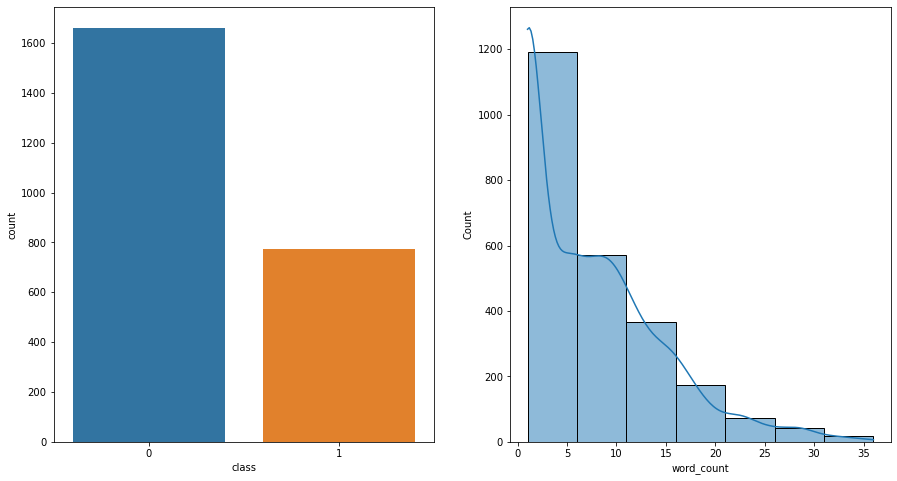

In [33]:
plt.rcParams['figure.figsize']=(15,8)
f,axes=plt.subplots(1,2)
sns.countplot(data['class'],ax=axes[0])
sns.histplot(data,x='word_count',binwidth=5,kde=True)

<AxesSubplot:xlabel='polarity', ylabel='Count'>

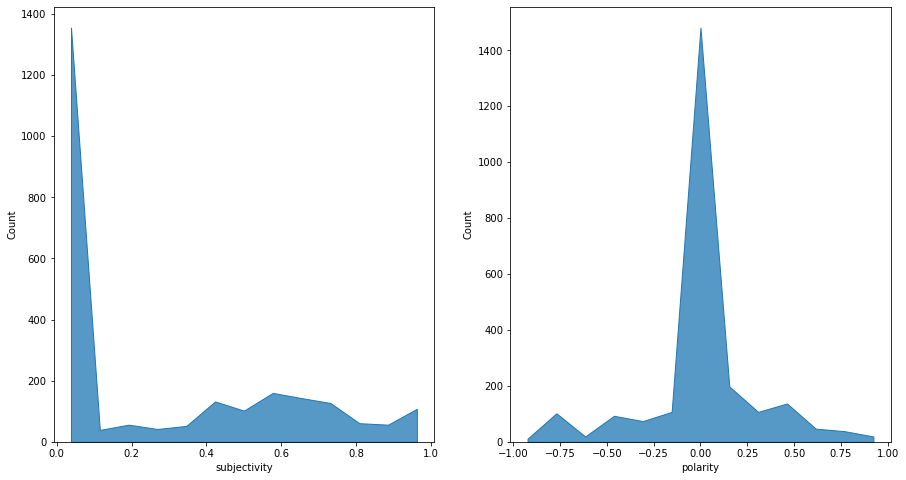

In [34]:
plt.rcParams['figure.figsize']=(15,8)
f,axes=plt.subplots(1,2)
sns.histplot(data=data_sample,x='subjectivity',element="poly",ax=axes[0])
sns.histplot(data=data_sample,x='polarity',element="poly")

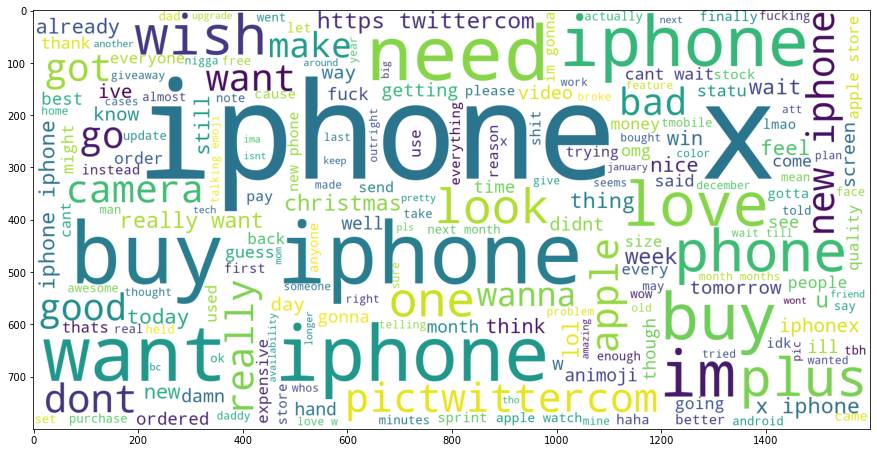

In [35]:
# visualize most recuring words in purchase intent and non purchase intent tweets
data_pi=data[data['class']==1]
data_no=data[data['class']==0]
wc=WordCloud(background_color='white',width=1600, height=800)
wc.generate(" ".join(data_pi['text']))
wc2=WordCloud(background_color='white',width=1600, height=800)
wc2.generate(" ".join(data_no['text']))
plt.imshow(wc)

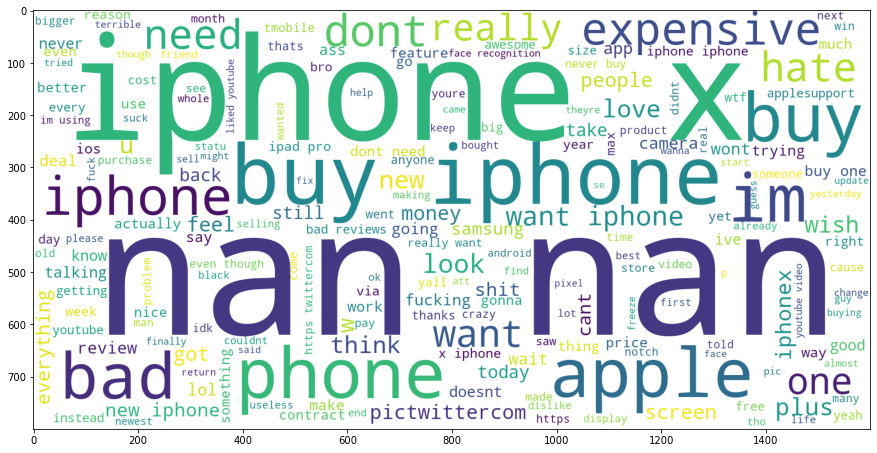

In [36]:
plt.imshow(wc2)

## Spliting of dataset

In [37]:
y=pd.get_dummies(data['class']).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
y

(2189, 250) (244, 250)
(2189, 2) (244, 2)


array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]], dtype=uint8)

## Training LSTM model

In [38]:
model=Sequential()
model.add(Embedding(50000,100,input_length=x.shape[1]))
# model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
fit=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.1)

Epoch 1/5
62/62 [==============================] - 42s 387ms/step - loss: 0.5783 - accuracy: 0.6884 - val_loss: 0.3957 - val_accuracy: 0.7763
Epoch 2/5
62/62 [==============================] - 23s 377ms/step - loss: 0.3475 - accuracy: 0.8556 - val_loss: 0.3318 - val_accuracy: 0.8356
Epoch 3/5
62/62 [==============================] - 25s 404ms/step - loss: 0.1940 - accuracy: 0.9299 - val_loss: 0.3045 - val_accuracy: 0.8676
Epoch 4/5
62/62 [==============================] - 22s 357ms/step - loss: 0.1144 - accuracy: 0.9600 - val_loss: 0.3491 - val_accuracy: 0.8721
Epoch 5/5
62/62 [==============================] - 26s 429ms/step - loss: 0.0889 - accuracy: 0.9584 - val_loss: 0.3845 - val_accuracy: 0.8584


In [39]:
acr=model.evaluate(x_test,y_test)

8/8 [==============================] - 0s 45ms/step - loss: 0.3403 - accuracy: 0.8893


In [40]:
y_test

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1,

In [41]:
# cal=t.texts_to_sequences(test)
cal=sequence.pad_sequences(x,maxlen=250)
pred=model.predict_classes(x_test)
pred=np.reshape(pred,(len(pred),1))
pred

C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [42]:
y=list(y_test)
y2=[]
for i in range(len(y)):
    if y[i][0]==1:
        y2.append(0)
    else:
        y2.append(1)
len(y2)

244

In [43]:
y_true = y2
y_pred = list(pred)
target_names = ['no','yes']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          no       0.92      0.92      0.92       169
         yes       0.82      0.83      0.82        75

    accuracy                           0.89       244
   macro avg       0.87      0.87      0.87       244
weighted avg       0.89      0.89      0.89       244



In [46]:
x=t.texts_to_sequences(["who wants an iphone if have samsung"])
x=sequence.pad_sequences(x,maxlen=250)
p=model.predict_classes(x)
p=np.reshape(p,(len(p),1))
p

array([[1]], dtype=int64)